# PROJECT 1

My 2functions gradient descent and normal equation worked very well on the plants power dataset but on this dataset the score are really strange

I think its because of the number of my features (65)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# GRADIENT DESCENT

In [2]:
def gradientDescent(X,y,alpha,m,numIterations):
    m=len(X.index)
    X_bias =np.ones((m,1)) #m is number of records in the dataset.
    X['bias']=X_bias
    xTrans = X.transpose()
    #w=np.random.randn()
    w=np.zeros(len(X.columns))
    for i in range(numIterations):
        pred = np.dot(X, w)
        loss = pred - y
        cost = np.sum(loss ** 2) / (2 * m)
        #print("Iteration %d | Cost: %f" % (i, cost))
        gradient = np.dot(xTrans, loss) / m
        # update
        w = w - alpha * gradient
    y_pred=X.to_numpy().dot(w)
    return w,y_pred

# NORMAL EQUATION 

In [3]:
def normal_equation(X,y):
    m=len(X.index)
    X_bias = np.ones((m,1)) #m is number of records in the dataset.
    X['bias']=X_bias #add biais in features
    X_transpose = np.transpose(X)   #calculating transpose
    X_transpose_dot_X = X_transpose.dot(X)  # calculating dot product
    inv_XtX = np.linalg.inv(X_transpose_dot_X) #calculating inverse
    Xty=X_transpose.dot(y)
    w=inv_XtX.dot(Xty)
    y_predict=X.dot(w)
    return w,y_predict


In [4]:
df=pd.read_csv('Bike Rental UCI dataset.csv')
#df['demand']=pd.qcut(df['demand'], q=5,labels=[1,2,3,4,5])


In [5]:
df.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0,Sat,0,1


In [6]:
df.head()
df.describe()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,days,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.627229,0.190098,361.562576,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.192930,0.122340,209.042828,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.480000,0.104500,181.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.630000,0.194000,362.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.780000,0.253700,543.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,0.850700,724.000000,977.000000


In [7]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,days,demand
season,1,-0.0107425,0.830386,-0.0061169,-0.00958453,0.0137431,-0.0145236,0.312025,0.150625,-0.149773,0.404046,0.178056
yr,-0.0107425,1,-0.0104729,-0.003867,0.00669162,-0.00219601,-0.0191569,0.0409134,-0.0835464,-0.00873953,0.866014,0.250495
mnth,0.830386,-0.0104729,1,-0.00577191,0.0184303,-0.00347692,0.00539952,0.201691,0.164411,-0.135386,0.489163,0.120638
hr,-0.0061169,-0.003867,-0.00577191,1,0.000479136,0.002285,-0.0202025,0.137603,-0.276498,0.137252,-0.00489909,0.394071
holiday,-0.00958453,0.00669162,0.0184303,0.000479136,1,-0.252471,-0.0170361,-0.0273405,-0.0105885,0.00398763,0.0147212,-0.0309273
workingday,0.0137431,-0.00219601,-0.00347692,0.002285,-0.252471,1,0.0446722,0.0553903,0.0156875,-0.0118298,-0.00341672,0.0302844
weathersit,-0.0145236,-0.0191569,0.00539952,-0.0202025,-0.0170361,0.0446722,1,-0.10264,0.41813,0.0262257,-0.0141883,-0.142426
temp,0.312025,0.0409134,0.201691,0.137603,-0.0273405,0.0553903,-0.10264,1,-0.0698814,-0.0231253,0.136114,0.404772
hum,0.150625,-0.0835464,0.164411,-0.276498,-0.0105885,0.0156875,0.41813,-0.0698814,1,-0.290105,0.00969552,-0.322911
windspeed,-0.149773,-0.00873953,-0.135386,0.137252,0.00398763,-0.0118298,0.0262257,-0.0231253,-0.290105,1,-0.0745911,0.0932338


# OUTLIERS


We didnt remove the otliers but we coreccted them 
The number 8 and 370 correpsoond to mean-sd 
I tried multiple values and i get the best result with these ones

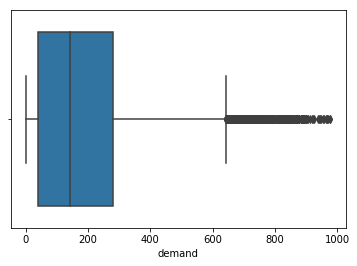

In [8]:
sns.boxplot(x=df['demand'])
#too much outliers

In [9]:
#we select outliers 
outliers_low=df.loc[df['demand']<=8]
outliers_high=df.loc[df['demand']>=370]
df=df.loc[(df['demand']<370)&(df['demand']>8)]

In [10]:
#we correct outliers
outliers_low['demand']=8
outliers_high['demand']=370
outliers=pd.concat([outliers_low, outliers_high])

In [11]:
#we add the corrected outliers to the dataset
df=pd.concat([df,outliers])

# Holiday and Workday

we notice taht some days are not holiday and not workday we created a column for these days 

In [12]:
df['demand'].mean()

165.40589216870936

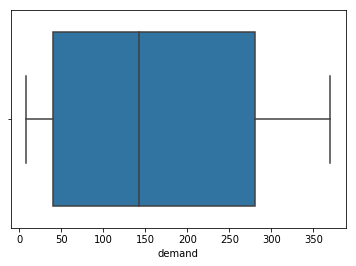

In [13]:
sns.boxplot(x=df['demand'])

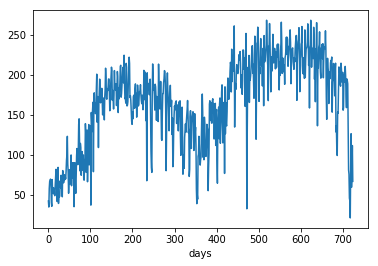

In [14]:
df.groupby(df['days'])['demand'].agg('mean').plot()

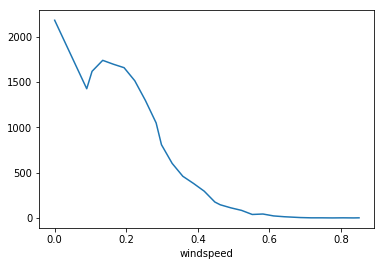

In [15]:
df.groupby(df['windspeed'])['demand'].agg('count').plot()

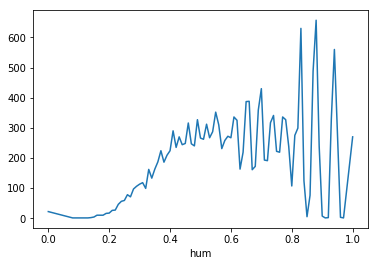

In [16]:
df.groupby(df['hum'])['demand'].agg('count').plot()

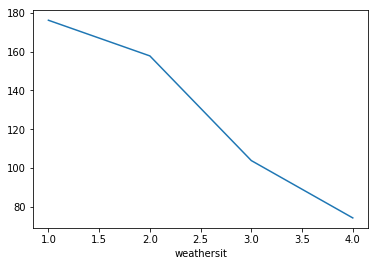

In [17]:
df.groupby(df['weathersit'])['demand'].agg('mean').plot()

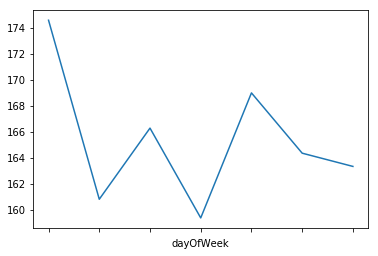

In [18]:
df.groupby(df['dayOfWeek'])['demand'].agg('mean').plot()

# FEATURES ENGINEERING

In [19]:
X=df
y=df['demand']
X=X.drop('demand',axis=1)

def cycle(hour):
    hour=hour-4
    if hour>12:
        hour-=12
    return hour

X['hr']=X['hr'].apply(lambda x:cycle(x))

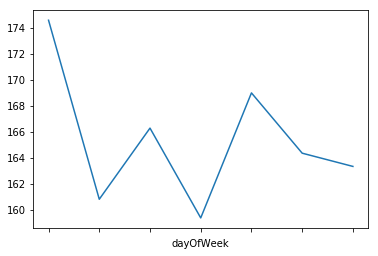

In [20]:
df.groupby(df['dayOfWeek'])['demand'].agg('mean').plot()

# Workingday and Holiday 

we notice taht some days are not holiday and not workday we created a column for these days 

In [21]:
X['otherday']=0
X.loc[(X['holiday']==0)&(X['workingday']==0),'otherday'] = 1

In [22]:
X

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,otherday
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,0,1
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,0,1
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,1
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,1
9,1,0,1,9,0,0,1,0.32,0.76,0.0000,Sat,0,1
10,1,0,1,10,0,0,1,0.38,0.76,0.2537,Sat,0,1
11,1,0,1,11,0,0,1,0.36,0.81,0.2836,Sat,0,1
12,1,0,1,12,0,0,1,0.42,0.77,0.2836,Sat,0,1
13,1,0,1,13,0,0,2,0.46,0.72,0.2985,Sat,0,1
14,1,0,1,14,0,0,2,0.46,0.72,0.2836,Sat,0,1


# One hot Encoded

#i one encoded all the 'time features' because they are cycle for exmaple month 12 and 1 are rlly close but the number 1 and 12 are far same for hour 23 and 0 or for day Sunday and Monday

In [23]:
#+1% score
one_hot = pd.get_dummies(X['season'],prefix='season')
# Drop column as it is now encoded
#X = X.drop('season',axis = 1)
# Join the encoded X
X = X.join(one_hot) 

In [24]:
one_hot = pd.get_dummies(X['dayOfWeek'],prefix='dayOfWeek')
# Drop column as it is now encoded
X = X.drop('dayOfWeek',axis = 1)
# Join the encoded df
X = X.join(one_hot)

#faire un one hot pour les jours importants

In [25]:
#+2% score
one_hot = pd.get_dummies(X['weathersit'],prefix='weathersit')
# Drop column as it is now encoded
#X = X.drop('weathersit',axis = 1)
# Join the encoded df
X = X.join(one_hot)

In [26]:
one_hot = pd.get_dummies(X['hr'],prefix='hr')
# Drop column as it is now encoded
#X = X.drop('hr',axis = 1)
# Join the encoded df
X = X.join(one_hot)

In [27]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'days', 'otherday', 'season_1', 'season_2',
       'season_3', 'season_4', 'dayOfWeek_Fri', 'dayOfWeek_Mon',
       'dayOfWeek_Sat', 'dayOfWeek_Sun', 'dayOfWeek_Thr', 'dayOfWeek_Tue',
       'dayOfWeek_Wed', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6',
       'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14',
       'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23'],
      dtype='object')

In [28]:
# Gain de 1% sur le test
one_hot = pd.get_dummies(X['mnth'],prefix='mnth')
# Drop column as it is now encoded
#X = X.drop('mnth',axis = 1)
# Join the encoded df
X = X.join(one_hot)

# ML part

# TREE regressor

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y)
tree_regressor=tree.DecisionTreeRegressor()
#the depth 12 
tree_regressor.fit(X_train,y_train)
tree_regressor.score(X_train,y_train)
y_pred=tree_regressor.predict(X_test)

In [31]:
tree_regressor.score(X_train,y_train)

1.0

In [32]:
tree_regressor.score(X_test,y_test)

0.8908910480071017

# SKLEARN LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)
reg.score(X_train, y_train)


0.7401042581638493

In [34]:
reg.coef_

array([ 2.24972309e+04,  1.40606682e+02, -1.63816410e+09,  1.24418922e+09,
        3.51357901e+10,  3.51357901e+10, -4.36230287e+10,  1.82786899e+02,
       -5.69754575e+01, -3.53688238e+01, -2.41590798e-01, -6.22219305e+09,
        1.46042046e+11,  1.46042023e+11,  1.46042001e+11,  1.46041978e+11,
        2.78068172e+10,  2.78068172e+10,  6.91648003e+10,  6.91648003e+10,
        2.78068172e+10,  2.78068172e+10,  2.78068172e+10, -1.54996394e+11,
       -1.11373366e+11, -6.77503369e+10, -2.41273082e+10,  3.51015419e+10,
        3.38573526e+10,  3.26131634e+10,  3.13689742e+10,  3.01247850e+10,
        2.88805958e+10,  2.76364066e+10,  2.63922175e+10,  2.51480283e+10,
        2.39038391e+10,  2.26596498e+10,  2.14154606e+10,  2.01712714e+10,
        1.89270822e+10,  1.76828929e+10,  1.64387037e+10,  1.51945146e+10,
        1.39503254e+10,  1.27061361e+10,  1.14619469e+10,  1.02177576e+10,
        8.97356837e+09,  7.72937911e+09,  6.48518985e+09,  2.34350820e+10,
        2.50732461e+10,  

In [35]:
y_pred=reg.predict(X_test)


In [36]:
reg.score(X_test, y_test)

0.7321286357901517

In [37]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.6383920270834175

# GradientDescent and Normal equation 

i dont know why but i have to put the learning rate very low to not have my thetas exploding

0.0000114 is the best learning rate but still bad results

My normal equation and gradient descent works very well (same score than skleanr) on the plants power dataset but not on this one


In [38]:
coef,y_pred=gradientDescent(X,y,0.000011,len(y),100)

AttributeError: 'DataFrame' object has no attribute 'to_numpy'

In [ ]:
coef

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y)

In [ ]:
coef,y_pred=normal_equation(X,y)
coef

In [ ]:
mean_absolute_error(y_pred,y)

In [ ]:
r2_score( y,normal_equation(X,y))